In [1]:
#Tesseract OCRの関連ライブラリーとPythonラッパーをインストール
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install pyocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,771 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 131352 files and directories currently installed.)
Preparing to unpack .../tesseract

In [2]:
!curl -L https://github.com/tesseract-ocr/tessdata/raw/master/jpn.traineddata > jpn.traineddata
!cp jpn.traineddata /usr/share/tesseract-ocr/4.00/tessdata/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   145  100   145    0     0    714      0 --:--:-- --:--:-- --:--:--   714
100 34.0M  100 34.0M    0     0  30.4M      0  0:00:01  0:00:01 --:--:-- 47.9M


In [0]:
#モジュールをインポート
from PIL import Image
import sys
import pyocr
import pyocr.builders

import numpy as np
import cv2

from IPython.display import display
from IPython.display import Image as IpyImage

def display_cv_image(image, format='.jpg'):
    decoded_bytes = cv2.imencode(format, image)[1].tobytes()
    display(IpyImage(data=decoded_bytes))

In [4]:
#OCRが使用可能かをチェック
tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("OCR tool is not found")
    sys.exit(1)

#OCRツール名を表示
tool = tools[0]
print("OCR tool is '%s'" % (tool.get_name()))

OCR tool is 'Tesseract (sh)'


In [5]:
#OCR対応言語を表示
langs = tool.get_available_languages()
print("Available languages: %s" % ", ".join(langs))
lang = langs[0]
print("Will use lang '%s'" % (lang))

Available languages: osd, jpn, eng
Will use lang 'osd'


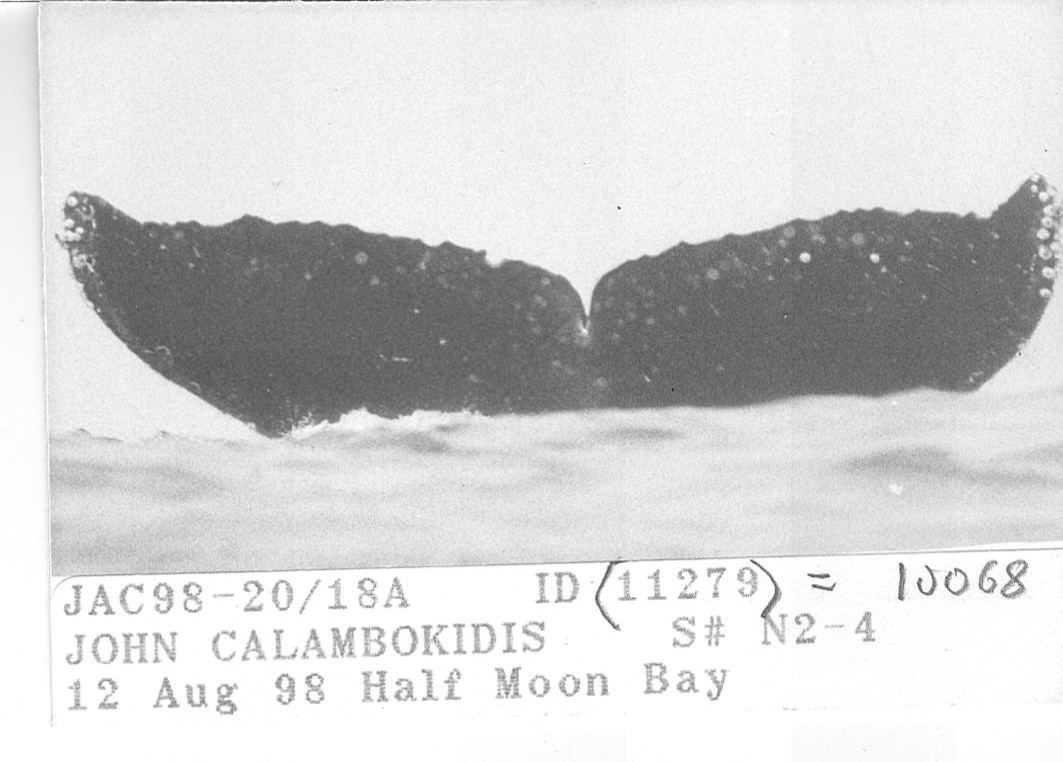

In [6]:
filename = '8f7b64491.jpg'
img = cv2.imread(filename)
display_cv_image(img)

In [7]:
 #読み込んだ画像をOCRでテキスト抽出してみる。
txt = tool.image_to_string(
    Image.open(filename),
    lang="eng",
    builder=pyocr.builders.TextBuilder(tesseract_layout=7)
)
print( txt )